# Lab 2 - Linear Regression


- Your name: 

- Your student code: 

## 1. Tạo một Simple Linear Regression với thư viện scikit-learn

Ở phần này, bạn sẽ thực hiện một số công việc sau:

- Đọc và load dữ liệu từ file với hàm `pd.read_csv()` của thư viện `pandas`
- Chia dữ liệu thành train set và test set dùng hàm `train_test_split()` từ thư viện `sklearn`
- Dùng hàm `LinearRegression` từ thư viện `sklearn` để tạo mô hình hồi quy tuyến tính 
- Fit mô hình trên train set với hàm `fit()`
- Predict trên test set dùng mô hình đã huấn luyện được
- Tính Mean Squared Error (MSE) và R-Squared score dùng hàm `mean_squared_error()` và  `r2_score()` từ thư viện `sklearn`
- Vẽ biểu đồ các điểm dữ liệu cùng với các dự đoán của mô hình dùng thư viện `matplotlib`

Bên dưới là các đường link để bạn tham khảo thêm về các hàm đã đề cập ở trên.

- [pd.read_csv(filename)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html): Trả về một pandas dataframe chứa từ file dữ liệu
- [sklearn.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): Tách dữ liệu (ngẫu nhiên) thành tập train và test 
- [sklearn.LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): Khởi tạo một linear model
- [LinearRegression.fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit): Fit một linear model trên train data
- [LinearRegression.predict()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict): Predict dùng linear model đã tạo
- [mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error): Tính mean squared error (MSE)
- [mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.r2_score): Tính R-Squared score ($R^2$)
- [plt.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html): Vẽ biểu đồ

### 1.1. Tìm hiểu tổng quan về dữ liệu

Phần này sẽ dùng tập dữ liệu `Advertising.csv` để minh họa.

#### 1.1.1. Load dữ liệu

In [1]:
import pandas as pd

# Đọc dữ liệu từ "Advertising.csv"
ads = pd.read_csv('./data/Advertising.csv')

#### 1.1.2. Khám phá tổng quan về dữ liệu

In [5]:
ads.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [17]:
# Gán số tiền chi cho quảng cáo qua `TV` là `X`
X = ads[['TV']]
# Gán doanh số thu được, `sales`, là `y`
y = ads[['sales']]

### 1.2. Chia dữ liệu

Ta sẽ chia dữ liệu làm 2 tập train và test với tỷ lệ 80/20.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))


Labels counts in y: 200
Labels counts in y_train: 140
Labels counts in y_test: 60


### 1.3. Fit mô hình

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Tạo mô hình Linear Regression dùng sklearn
lr = LinearRegression()

# Fit mô hình với train data
lr.fit(X_train, y_train)

# Predict trên test data dùng mô hình đã train
y_pred_test = lr.predict(X_test)

### 1.4. Đánh giá mô hình

Ta sẽ đánh giá mô hình dùng Mean Squared Error (MSE) và R-Squared score ($R^2$).

$$MSE(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \overline{y})^2}$$

Trong đó:

- $\hat{y_i}$ là giá trị mà mô hình cho $x_i$
    
- $y_i$ là output thật sự cho $x_i$
    
- $n$ là số lượng phần tử trong dữ liệu
    
- $\overline{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Tính MSE trên test data
mse = mean_squared_error(y_test, y_pred_test)

# In ra MSE
print(f'The test MSE is {mse}')

# Tính R-squred score trên test data
r2 = r2_score(y_test, y_pred_test)

# In ra R-squred score
print(f'The test R-squred score is {r2}')

The test MSE is 10.571057434656955
The test R-squred score is 0.575061860494331


### 1.5. Trực quan hóa kết quả

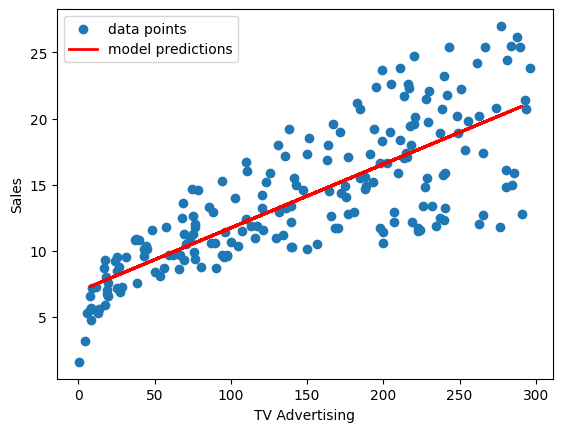

In [26]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ gồm dữ liệu với đường hồi quy tuyến tính (linear regression line)
fig, ax = plt.subplots()
ax.scatter(X, y, label = 'data points')

# Vẽ biểu đồ gồm test data và predicted output trên test data
ax.plot(X_test, y_pred_test, color='red', linewidth = 2, label = 'model predictions')
ax.set_xlabel('TV Advertising')
ax.set_ylabel('Sales')
ax.legend()

### 1.6. Thay đổi `test_size`

Nếu ở phần chia dữ liệu, bạn thay đổi tham số `test_size = 0.3` thì MSE và $R^2$ sẽ thay đổi như thế nào?

In [27]:
# Your answers

mse = '___'
r2 = '___'

## 2. Tạo nhiều mô hình Linear Regression với thư viện scikit-learn

In [33]:
# Khởi tạo một list để lưu các giá trị MSE cho mỗi mô hình
mse_train_list = []
mse_test_list = []
coef_list = []
intercept_list = []

# Tạo một list các kết hợp có thể có của các thuộc tính để tạo các mô hình khác nhau
cols = [['TV'],['radio'],['newspaper'],['TV','radio'],['TV','newspaper'],['radio','newspaper'],['TV','radio','newspaper']]

# Lặp qua tất cả các kết hợp có thể có
for i in cols:
    # Thiết lập mỗi bộ kết hợp trong list trên như là `X`
    X = ads[i]
    
    # Thiết lập "sales" như là `y`
    y = ads["sales"]
   
    # Tách data thành train/test sets với tỷ lệ 80%/20% 
    # Thiết lập random_state = 0 (random_state ảnh hưởng đến tính ngẫu nhiên ở mỗi lần chạy)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

    # Khởi tạo một Linear Regression model
    lr = LinearRegression()

    # Fit mô hình trên train data
    lr.fit(X_train, y_train)
    
    # Predict trên train và test data dùng mô hình đã huấn luyện
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    # Tính MSE trên train và test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Thêm Train MSE và Test MSE vào kết quả
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    
    # Thêm các hệ số của mỗi mô hình vào kết quả
    coef_list.append(lr.coef_)
    intercept_list.append(lr.intercept_)

Hiển thị MSE và $R^2$ ứng với mỗi mô hình.

In [35]:
print("Input\tIntercept\tCoeficients\tTrain MSE\tTest MSE")
for i in range(len(mse_train_list)):
    print(f'{cols[i]}\t{intercept_list[i]}\t{coef_list[i]}\t{mse_train_list[i]}\t{mse_test_list[i]}')

Input	Intercept	Coeficients	Train MSE	Test MSE
['TV']	7.292493773559356	[0.04600779]	10.617238416139852	10.186181934530211
['radio']	9.387577017342657	[0.20651177]	16.596466917138976	24.237233037132135
['newspaper']	12.400810905018648	[0.06030378]	24.13777119975384	32.13714634300907
['TV', 'radio']	2.9514407608079694	[0.04451639 0.19520741]	2.409949135256197	4.391429763581876
['TV', 'newspaper']	6.237423658535929	[0.04487447 0.0406848 ]	9.8699909080314	8.68768267569058
['radio', 'newspaper']	9.078037212346736	[0.19891254 0.01617465]	16.489367436565196	24.783395482938158
['TV', 'radio', 'newspaper']	2.994893030495323	[ 0.04458402  0.19649703 -0.00278146]	2.406814755818906	4.40211829144968


## 3. Regularization với Ridge, Lasso, và ElasticNet

### 3.1. Load dữ liệu

Ở phần này ta sẽ sử dụng tập dữ liệu `Boston.csv`. Tâp dữ liệu này gồm một số thuộc tính sau: 

<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [37]:
## Load dữ liệu
boston = pd.read_csv("./data/Boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 3.2. Chọn `medv` là output

In [38]:
import pandas as pd
from sklearn import preprocessing

# Chọn medv là output
y = boston['medv']

# Chọn các biến còn lại là input
X = boston.drop('medv', axis=1)

# Chuẩn hóa (normalize) input theo chuẩn `l2`
X_norm = preprocessing.normalize(X, 'l2')

### 3.3. Tách dữ liệu thành train và test set

Tách dữ liệu thành train và test set với tỷ lệ 80/20 với `random_state = 1`.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

### 3.4. Áp dung mô hình Linear Regression dùng thư viện scikit-learn

In [41]:
# Khởi tạo một Linear Regression model
lr = LinearRegression()

# Fit model trên train data
lr.fit(X_train, y_train)

# Predict trên test data
y_test_pred = lr.predict(X_test)

### 3.5. Tính MSE

In [42]:
# Dùng hàm mean_squared_error để tính MSE trên test data
mse = mean_squared_error(y_test, y_test_pred)

# In ra MSE value
print ("Test MSE: ", mse)

Test MSE:  23.380836480270055


### 3.6. In ra các hệ số của Linear Regression model

In [45]:
import numpy as np

# Tạo một dictionary cho các coefficient với tên biến là các key
lr_coef = dict(zip(X.columns, np.transpose(lr.coef_)))

# Linear regression coefficients
lr_x = list(lr_coef.keys())
lr_y = list(lr_coef.values())



{'crim': -0.11238686745728331, 'zn': 0.05805870735149374, 'indus': 0.0183593559335829, 'chas': 2.1299775997319537, 'nox': -19.58110122468678, 'rm': 3.095461657079216, 'age': 0.004452652275661145, 'dis': -1.5004762414744015, 'rad': 0.30535896936795975, 'tax': -0.011123087897876985, 'ptratio': -0.989007562322306, 'black': 0.007321300169405305, 'lstat': -0.5446449971618594}


### 3.7. Dùng mô hình Ridge Linear Regression

In [46]:
from sklearn.linear_model import Ridge

# Tạo một Ridge Regression model với alpha = 0.01
ridge_reg = Ridge(alpha = 0.01)

# Fit mô hình trên train data
ridge_reg.fit(X_train, y_train)

# Predict trên test data
y_test_pred = ridge_reg.predict(X_test)

### 3.8. Tính MSE với Ridge regularization

In [47]:
# Tính Test MSE
mse_ridge = mean_squared_error(y_test, y_test_pred)

# In ra Test MSE
print ("Ridge Test MSE: ", mse_ridge)

Ridge Test MSE:  23.372229405582356


### 3.9. In ra các hệ số của Ridge Regression model

In [49]:
# Tạo một dictionary cho các coefficient với tên biến là các key
ridge_coef = dict(zip(X.columns, np.transpose(ridge_reg.coef_))) 
ridge_coef

# Lasso regularisation coefficients
ridge_x = list(ridge_coef.keys())
ridge_y = list(ridge_coef.values())

### 3.10. Dùng mô hình Lasso Regression

In [50]:
from sklearn.linear_model import Lasso

# Tạo một Ridge Regression model với alpha = 0.01
lasso_reg = Lasso(alpha=0.01)

# Fit mô hình trên train data
lasso_reg.fit(X_train, y_train)

# Predict trên test data
y_test_pred = lasso_reg.predict(X_test)

### 3.11. Tính MSE với Lasso regularization

In [51]:
# Tính Test MSE
mse_lasso = mean_squared_error(y_test, y_test_pred)

# In ra Test MSE
print ("Lasso Test MSE: ", mse_lasso)

Lasso Test MSE:  23.332358963161976


### 3.12. In ra các hệ số của Lasso Regression model

In [55]:
# Tạo một dictionary cho các coefficient với tên biến là các key
lasso_coef = dict(zip(X.columns, np.transpose(lasso_reg.coef_))) 
#lasso_coef

# Lasso regularisation coefficients
lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())

### 3.13. Dùng mô hình ElasticNet Regression

In [58]:
from sklearn.linear_model import ElasticNet

# Tạo một ElasticNet Regression model với alpha = 0.01, l1_ratio = 0.5
elasticnet_reg = ElasticNet(alpha=0.01, l1_ratio=0.5)

# Fit mô hình trên train data
elasticnet_reg.fit(X_train, y_train)

# Predict trên test data
y_test_pred = elasticnet_reg.predict(X_test)

### 3.14. Tính MSE với ElasticNet regularization

In [60]:
# Tính Test MSE
mse_elasticnet = mean_squared_error(y_test, y_test_pred)

# In ra Test MSE
print ("Lasso Test MSE: ", mse_elasticnet)

Lasso Test MSE:  23.33167313088151


### 3.16. In ra các hệ số của ElasticNet Regression model

In [64]:
# Tạo một dictionary cho các coefficient với tên biến là các key
elasticnet_coef = dict(zip(X.columns, np.transpose(elasticnet_reg.coef_))) 

# ElasticNet regularisation coefficients
elasticnet_x = list(elasticnet_coef.keys())
elasticnet_y = list(elasticnet_coef.values())

### 3.13. Vẽ biểu đồ so sánh hệ số của các mô hình

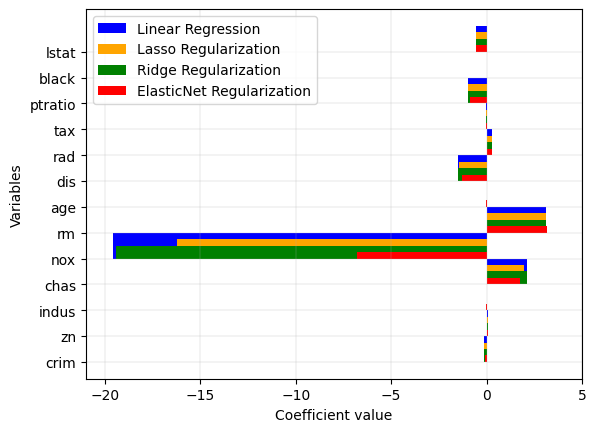

In [63]:
plt.rcdefaults()

plt.barh(lr_x, lr_y, 1.0, align = 'edge', color = "blue", label = "Linear Regression")
plt.barh(lasso_x, lasso_y, 0.75 ,align = 'edge', color = "orange", label = "Lasso Regularization")
plt.barh(ridge_x, ridge_y, 0.5 ,align = 'edge', color = "green", label = "Ridge Regularization")
plt.barh(elasticnet_x, elasticnet_y, 0.25 ,align = 'edge', color = "red", label = "ElasticNet Regularization")
plt.grid(linewidth = 0.2)
plt.xlabel("Coefficient value")
plt.ylabel("Variables")
plt.legend(loc = 'best')
plt.xlim(-21, 5)
plt.show()

### 3.14. Nhận xét về các mô hình

Nhận xét về hiệu quả của Lasso Regression và Ridge Regression so với Linear Regression

- 

- 


## 4. Model selection cho Ridge Regression dùng phương pháp holdout

![holdout_model_selection](./image/holdout_model_selection.JPG)

### 4.1. Chia dữ liệu

In [ ]:
# Chia dữ liệu boston thành 2 tập train_val và test set với tỷ lệ 80/20
boston_train_val, boston_test = train_test_split(___, test_size = ___, random_state = 1)

# Tiếp theo, chia tập train_val thành 2 tập train và validation set với tỷ lệ 75/25
boston_train, boston_val = train_test_split(___, test_size = ___, random_state = 1)

features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

X_train = boston_train[features]
y_train = boston_train[['medv']]

X_val = boston_val[features]
y_val = boston_val[['medv']]

X_test = boston_test[features]
y_test = boston_test[['medv']]

### 4.2. Huấn luyện mô hình với các giá trị tham số `alpha` khác nhau

In [ ]:
# Create three lists for train, validation, and test MSE
train_mse = []
val_mse = []
test_mse = []

# List of hyper-parameter values 
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1, 10, 1e2, 1e3, 1e4]

# Loop over all the alpha values
for alpha in alphas:
    # Tạo mô hình Ridge regression với tham số alpha
    ridge_reg = Ridge(___)

    # Fit mô hình trên train data
    ridge_reg.fit(___, ___)
    
    # Predict trên train set 
    y_train_pred = ridge_reg.predict(___)
    
    # Predict trên validation set 
    y_val_pred = ridge_reg.predict(___)

    # Predict trên test set 
    y_test_pred = ridge_reg.predict(___)
    
    # Tính train, validation, và test MSE
    mse_train = mean_squared_error(___, ___) 
    mse_val = mean_squared_error(___, ___)
    mse_test = mean_squared_error(___, ___)
    
    # Thêm các MSE vào các list tương ứng
    train_mse.append(___)
    val_mse.append(___)
    test_mse.append(___)
    
    # In ra train, validation, và test MSE theo alpha
    print('alpha: {:7} | train mse: {:5} | val mse: {:5} | test mse: {:5}'.
          format(___, round(___, 2), round(___, 2), round(___, 2)))

### 4.3. Chọn giá trị `alpha` cho kết quả tốt nhất trên validation set

In [ ]:
# Chọn giá trị alpha (hyper-parameter), cho val mse nhỏ nhất trên validation data 
best_alpha = ___

# In ra best alpha (hyper-parameter)
print(f'The best alpha (hyper-parameter) value, alpha = {best_alpha}')

The best alpha (hyper-parameter) value, alpha = 0.1


### 4.4. Vẽ biểu đồ train/val/test MSE theo alpha

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

# Vẽ biểu đồ train MSE theo các giá trị alpha
ax.plot(___, ___, 's--', label = 'Train error', color = 'blue', linewidth = 2)

# Vẽ biểu đồ validation MSE theo các giá trị alpha
ax.plot(___, ___, 's-', label = 'Val error',color ='green', linewidth = 2)

# Vẽ biểu đồ test MSE theo các giá trị alpha
ax.plot(___, ___, 's-', label = 'Test error',color ='purple', linewidth = 2)

# Vẽ đường thẳng đứng ứng với best alpha
ax.axvline(___, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {___}')

ax.set_xlabel('Value of Alpha', fontsize = 15)
ax.set_ylabel('Mean Squared Error',fontsize = 15)
ax.set_ylim([15, 55])
ax.legend(loc = 'upper left', fontsize = 16)
ax.set_title('Mean Squared Error', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

## 5. Model selection cho Lasso Regression dùng phương pháp holdout

### 5.1. Huấn luyện mô hình với các giá trị tham số `alpha` khác nhau

In [ ]:
# Create three lists for train, validation, and test MSE
train_mse = []
val_mse = []
test_mse = []

# List of hyper-parameter values 
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2, 1e3, 1e4]

# Loop over all the alpha values
for alpha in alphas:
    # Tạo một Lasso regression với tham số alpha
    lasso_reg = Lasso(___)

    # Fit mô hình trên train data
    lasso_reg.fit(___, ___)
    
    # Predict trên train set 
    y_train_pred = lasso_reg.predict(___)
    
    # Predict trên validation set 
    y_val_pred = lasso_reg.predict(___)

    # Predict trên test set 
    y_test_pred = lasso_reg.predict(___)
    
    # Tính train, validation, và test MSE
    mse_train = mean_squared_error(___, ___) 
    mse_val = mean_squared_error(___, ___)
    mse_test = mean_squared_error(___, ___)
    
    # Thêm các MSE vào các list tương ứng
    train_mse.append(___)
    val_mse.append(___)
    test_mse.append(___)
    
    # In ra train, validation, và test MSE theo alpha
    print('alpha: {:7} | train mse: {:5} | val mse: {:5} | test mse: {:5}'.
          format(___, round(___, 2), round(___, 2), round(___, 2)))

### 5.2. Chọn giá trị alpha cho kết quả tốt nhất trên validation set

In [ ]:
# Chọn giá trị alpha (hyper-parameter), cho val mse nhỏ nhất trên validation data 
best_alpha = ___

# In ra best alpha (hyper-parameter)
print(f'The best alpha (hyper-parameter) value, alpha = {___}')

The best alpha (hyper-parameter) value, alpha = 0.01


### 5.3. Vẽ biểu đồ train/val/test MSE theo alpha

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

# Vẽ biểu đồ train MSE theo các giá trị alpha
ax.plot(___, ___, 's--', label = 'Train error', color = 'blue', linewidth = 2)

# Vẽ biểu đồ validation MSE theo các giá trị alpha
ax.plot(___, ___, 's-', label = 'Val error',color ='green', linewidth = 2)

# Vẽ biểu đồ test MSE theo các giá trị alpha
ax.plot(___, ___, 's-', label = 'Test error',color ='purple', linewidth = 2)

# Vẽ đường thẳng đứng ứng với best alpha
ax.axvline(___, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {___}')

ax.set_xlabel('Value of Alpha', fontsize = 15)
ax.set_ylabel('Mean Squared Error',fontsize = 15)
ax.set_ylim([15, 55])
ax.legend(loc = 'upper left', fontsize = 16)
ax.set_title('Mean Squared Error', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

## 6. Model selection cho Ridge Regression dùng phương pháp cross validation

### 6.1. Chia dữ liệu

In [ ]:
# Chia dữ liệu boston thành train và test set theo tỷ lệ 80/20
boston_train, boston_test = train_test_split(___, test_size = ___, random_state = 1)

features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

X_train = boston_train[features]
y_train = boston_train[['medv']]

X_test = boston_test[features]
y_test = boston_test[['medv']]

### 6.2. Dùng `RidgeCV` và `LassoCV` cho model selection

![k-folds cs](./image/cross_val.png)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

alphas = (0.001, 0.01, 0.1, 1, 10, 100, 1000)

linear_reg = LinearRegression().fit(___, ___)
linear_score = linear_reg.score(___, ___)
print('R^2 score for original least squares (OLS) model: {}\n'.format(___))

# Dùng k-fold cross validation cho Ridge và Lasso với các giá trị alpha ở trên và cv là k
k = 5
ridge_reg = RidgeCV(___, ___).fit(___, ___)
lasso_reg = LassoCV(___, ___).fit(___, ___)
   
ridge_alpha = ridge_reg.___
ridge_score = ridge_reg.score(___, ___)
print('Best alpha for ridge: {}'.format(___))
print('R^2 score for Ridge with alpha = {} is {}\n'.format(___, ___))

lasso_alpha = lasso_reg.___
lasso_score = lasso_reg.score(___, ___)
print('Best alpha for lasso: {}'.format(___))
print('R squared score for Lasso with alpha = {} is {}'.format(___, ___))

### 6.3. Dùng `KFold` cho model selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
label = ['medv']

X = boston[features]
y = boston[label]

alphas = (0.001, 0.01, 0.1, 1, 10, 100, 1000)

K = 10
kf = KFold(n_splits = K, shuffle = True, random_state = 1)

for alpha in alphas:
    train_mses = []
    test_mses = []
    for train_index, test_index in kf.split(X, y):
        
        # split data theo train_index và test_index
        X_train, X_test = ___, ___
        y_train, y_test = ___, ___

        # Tạo model theo alpha
        lasso_reg = Lasso(___, fit_intercept = True, random_state = 1)
        
        # Fit the model trên train set
        lasso_reg.fit(___, ___)
        
        # Predict trên train và test set
        y_train_pred = lasso_reg.predict(___)
        y_test_pred = lasso_reg.predict(___)
        
        # Tính train và test mse
        train_mse = mean_squared_error(___, ___)
        test_mse = mean_squared_error(___, ___)
        
        # Thêm train và test mse vào các list tương ứng
        train_mses.append(___)
        test_mses.append(___)
    
    # In ra train, validation, và test MSE theo alpha
    print('alpha: {:6} | mean(train_mse): {:6} | mean(test_mse): {:6}'.
          format(___, round(___, 2), round(___, 2)))